In [121]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay


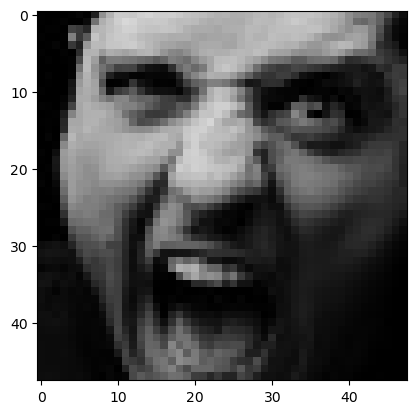

In [45]:
img_path="/Users/Nidhal Jegham/Untitled Folder/Training/Emotions/angry/Training_267631.jpg"
img=image.load_img(img_path)

plt.imshow(img)
plt.show()

In [46]:
cv2.imread(img_path)


array([[[ 1,  1,  1],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [72, 72, 72],
        [35, 35, 35],
        [13, 13, 13]],

       [[ 1,  1,  1],
        [ 0,  0,  0],
        [ 1,  1,  1],
        ...,
        [51, 51, 51],
        [18, 18, 18],
        [ 7,  7,  7]],

       [[ 0,  0,  0],
        [ 2,  2,  2],
        [ 2,  2,  2],
        ...,
        [35, 35, 35],
        [10, 10, 10],
        [ 5,  5,  5]],

       ...,

       [[12, 12, 12],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[12, 12, 12],
        [12, 12, 12],
        [12, 12, 12],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[13, 13, 13],
        [14, 14, 14],
        [13, 13, 13],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [77]:
train_emotions = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
)
train_gender= ImageDataGenerator(rescale=1/255)

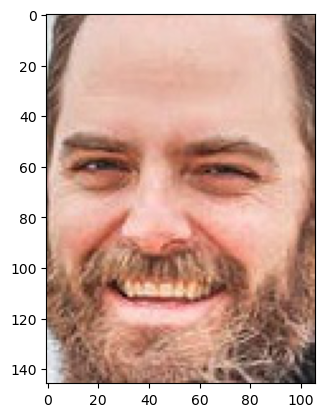

In [78]:
img_path_gender="/Users/Nidhal Jegham/Untitled Folder/Training/Gender/Man/man_1.jpg"
img_gender= image.load_img(img_path_gender)
plt.imshow(img_gender)


In [79]:
cv2.imread(img_path_gender)

array([[[222, 221, 211],
        [221, 222, 213],
        [211, 211, 211],
        ...,
        [122, 133, 155],
        [136, 146, 170],
        [146, 158, 182]],

       [[227, 226, 216],
        [219, 219, 213],
        [218, 218, 218],
        ...,
        [ 99, 110, 132],
        [ 95, 107, 131],
        [111, 123, 147]],

       [[228, 226, 218],
        [220, 220, 214],
        [226, 226, 226],
        ...,
        [ 97, 107, 131],
        [ 85,  96, 123],
        [ 99, 110, 137]],

       ...,

       [[235, 233, 233],
        [231, 227, 226],
        [235, 230, 227],
        ...,
        [ 36,  32,  31],
        [ 44,  42,  41],
        [ 53,  54,  52]],

       [[233, 231, 231],
        [237, 233, 232],
        [235, 230, 227],
        ...,
        [ 37,  33,  32],
        [ 33,  31,  31],
        [ 47,  45,  45]],

       [[236, 234, 234],
        [241, 239, 238],
        [245, 240, 239],
        ...,
        [ 34,  30,  29],
        [ 23,  21,  21],
        [ 37,  35,  35]]

In [80]:
emotion_classes=['Angry', 'Disgust', "Fear", "Happy", "Neutral", "Sad", "Surprise"]
gender_classes=['Man', "Woman"]

In [81]:
dataset_emotions= train_emotions.flow_from_directory("/Users/Nidhal Jegham/Untitled Folder/Training/Emotions", target_size=(46,46), 
                                            batch_size=23312, class_mode="categorical", color_mode= "rgb",
                                                             shuffle=True)
X_emotion,y_emotion= dataset_emotions.next()
X_emotion_train, X_emotion_val, y_emotion_train, y_emotion_val= train_test_split(X_emotion, y_emotion, shuffle=True, 
                                                                               stratify=y_emotion, test_size=0.3)

X_emotion_val, X_emotion_test, y_emotion_val, y_emotion_test= train_test_split(X_emotion_val, y_emotion_val, shuffle=True, 
                                                                               stratify=y_emotion_val, test_size=0.6)

Found 28709 images belonging to 7 classes.


In [82]:
dataset_gender= train_emotions.flow_from_directory("/Users/Nidhal Jegham/Untitled Folder/Training/Gender", target_size=(100,100), 
                                            batch_size=23312, class_mode="binary", color_mode= "rgb",
                                                             shuffle=True)
X_gender,y_gender= dataset_gender.next()
X_gender_train, X_gender_val, y_gender_train, y_gender_val= train_test_split(X_gender, y_gender, shuffle=True, 
                                                                                test_size=0.3)

X_gender_val, X_gender_test, y_gender_val, y_gender_test= train_test_split(X_gender_val, y_gender_val, shuffle=True, 
                                                                               stratify=y_gender_val, test_size=0.6)

Found 27166 images belonging to 2 classes.


In [173]:
model_gender = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(100, 100, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=3 , activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.25),


    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='argmax')
])


ValueError: Unknown activation function: argmax. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [174]:
opt = Adam(learning_rate=0.0001, decay=1e-6)

model_gender.compile(optimizer=opt, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [ ]:
model_gender.fit(X_gender_train,y_gender_train, 
                 batch_size=86, epochs=15,
                validation_data=(X_gender_val,y_gender_val))
                

Epoch 1/15
190/190 [==============================] - 185s 968ms/step - loss: 0.0896 - binary_accuracy: 0.9656 - val_loss: 0.2720 - val_binary_accuracy: 0.9128
Epoch 2/15
 69/190 [=========>....................] - ETA: 1:57 - loss: 0.0675 - binary_accuracy: 0.9764

In [141]:
y_gender_pred=model_gender.predict(X_gender_test)

132/132 [==============================] - 11s 86ms/step


In [132]:
y_gender_pred_label=[]
for i in range(len(y_gender_pred)):
   y_gender_pred_label.append(y_gender_pred[i].argmax()) 


In [133]:
y_gender_test_label=[]
for i in range(len(y_gender_test)):
   y_gender_test_label.append(y_gender_test[i].argmax()) 

In [172]:
y_gender_pred[:3]

array([[6.3192280e-04],
       [4.6468207e-01],
       [9.9999517e-01]], dtype=float32)

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'max'

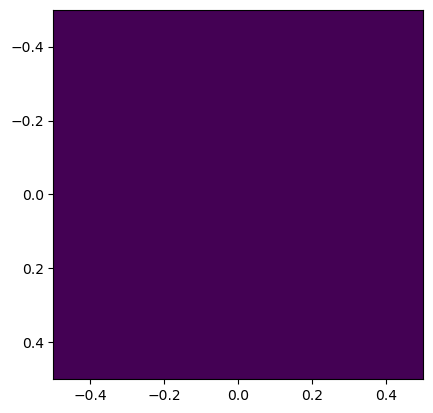

In [136]:
cm = tf.math.confusion_matrix(labels=y_gender_test_label,predictions=y_gender_pred_label)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()
print(classification_report(y_gender_test_label, y_gender_pred_label))